# ResNet50 on TinyImageNet (Accuracy, Implicit Model Calibration)

### Imports and Setup

In [1]:
# PyTorch and Models
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet50, ResNet50_Weights
import torch.optim.lr_scheduler as lr_scheduler

# Helper functions
import datasets.datasets as datasets
from util.trainer import train_model
from util.common import *

In [2]:
# Make PyTorch deterministic
torch.manual_seed(0)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Load Data, Training and Test Sets

In [3]:
# Loading dataset into training and test data
training_loader = datasets.tinyimagenet_training_loader()
test_loader = datasets.tinyimagenet_test_loader()

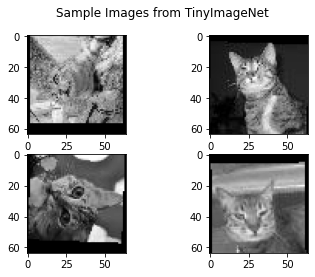

In [4]:
#Some sample images from the dataset
show_images (datasets.tinyimagenet_training_dataset(), 4, 'Sample Images from TinyImageNet')

### Trainings loop

In [ ]:
def train(model, label_smoothing_factor, epochs):
    #Definition of loss:
    cross_entropy = nn.CrossEntropyLoss(label_smoothing=label_smoothing_factor)

    #Defintion of optimizer:
    opt = optim.SGD(model.parameters(), lr = 0.004, momentum = 0.9, weight_decay= 1e-5)
    
    #Defintion of scheduler:
    scheduler = lr_scheduler.StepLR(opt, step_size=7, gamma=0.5)

    # Train model
    return (train_model(model, device, training_loader, test_loader, epochs, cross_entropy, opt, scheduler))

In [ ]:
model_Hard = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
model_Hard.fc = nn.Linear(2048, 200)
train(model_Hard, 0.0, NUM_EPOCHS_RESNET_50)

torch.save(model_Hard.state_dict(), "models/ResNet50_TinyImageNet_Accuracy_IMC/TinyImagenet_ResNet50_Hard.sd")

In [ ]:
model_Smooth_005 = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
model_Smooth_005.fc = nn.Linear(2048, 200)
history = train(model_Smooth_005, 0.05, NUM_EPOCHS_RESNET_50)

torch.save(model_Smooth_005.state_dict(), "models/ResNet50_TinyImageNet_Accuracy_IMC/TinyImagenet_ResNet50_Smooth_005.pt")

In [ ]:
model_Smooth_01 = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
model_Smooth_01.fc = nn.Linear(2048, 200)
history = train(model_Smooth_01, 0.1, NUM_EPOCHS_RESNET_50)

torch.save(model_Smooth_01.state_dict(), "models/ResNet50_TinyImageNet_Accuracy_IMC/TinyImagenet_ResNet50_Smooth_01.pt")

In [ ]:
model_Smooth_015 = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
model_Smooth_015.fc = nn.Linear(2048, 200)
history = train(model_Smooth_015, 0.15, NUM_EPOCHS_RESNET_50)

torch.save(model_Smooth_015.state_dict(), "models/ResNet50_TinyImageNet_Accuracy_IMC/TinyImagenet_ResNet50_Smooth_015.pt")

In [ ]:
model_Smooth_03 = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
model_Smooth_03.fc = nn.Linear(2048, 200)
history = train(model_Smooth_03, 0.3, NUM_EPOCHS_RESNET_50)

torch.save(model_Smooth_03.state_dict(), "models/ResNet50_TinyImageNet_Accuracy_IMC/TinyImagenet_ResNet50_Smooth_03.pt")

### Accuracy and Reliabity

In [5]:
# Temperature for temperature scaling
temperature = 1.7

model_Hard = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
model_Hard.fc = nn.Linear(2048, 200)
model_Hard.load_state_dict(torch.load("models/ResNet50_TinyImageNet_Accuracy_IMC/TinyImagenet_ResNet50_Hard.pt",map_location=device))
model_Hard.to(device)

# Compute Accuracy and Reliability
print(f"Accuarcy for ResNet50 w. Hard Labels: {compute_accuracy(model_Hard, test_loader, device).item():.2f}%")
rel_bins_Hard = bin_reliability(model_Hard, test_loader, device, NUM_BINS)
rel_bins_Temperature = bin_reliability(model_Hard, test_loader, device, NUM_BINS, temperature)

Accuarcy for ResNet50 w. Hard Labels: 72.20%


In [6]:
model_Smooth_005 = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
model_Smooth_005.fc = nn.Linear(2048, 200)
model_Smooth_005.load_state_dict(torch.load("models/ResNet50_TinyImageNet_Accuracy_IMC/TinyImagenet_ResNet50_Smooth_005.pt",map_location=device))
model_Smooth_005.to(device)

# Compute Accuracy and Reliability
print(f"Accuarcy for ResNet50 w. Smooth Labels (alpha = 0.05): {compute_accuracy(model_Smooth_005, test_loader, device).item():.2f}%")
rel_bins_Smooth = bin_reliability(model_Smooth_005, test_loader, device, NUM_BINS)

Accuarcy for ResNet50 w. Smooth Labels (alpha = 0.05): 72.65%


In [7]:
model_Smooth_01 = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
model_Smooth_01.fc = nn.Linear(2048, 200)
model_Smooth_01.load_state_dict(torch.load("models/ResNet50_TinyImageNet_Accuracy_IMC/TinyImagenet_ResNet50_Smooth_01.pt",map_location=device))
model_Smooth_01.to(device)

# Compute Accuracy and Reliability
print(f"Accuarcy for ResNet50 w. Smooth Labels (alpha = 0.1): {compute_accuracy(model_Smooth_01, test_loader, device).item():.2f}%")
rel_bins_Smooth_2 = bin_reliability(model_Smooth_01, test_loader, device, NUM_BINS)

Accuarcy for ResNet50 w. Smooth Labels (alpha = 0.1): 72.30%


In [8]:
model_Smooth_015 = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
model_Smooth_015.fc = nn.Linear(2048, 200)
model_Smooth_015.load_state_dict(torch.load("models/ResNet50_TinyImageNet_Accuracy_IMC/TinyImagenet_ResNet50_Smooth_015.pt",map_location=device))
model_Smooth_015.to(device)

# Compute Accuracy and Reliability
print(f"Accuarcy for ResNet50 w. Smooth Labels (alpha = 0.15): {compute_accuracy(model_Smooth_015, test_loader, device).item():.2f}%")
rel_bins_Smooth_3 = bin_reliability(model_Smooth_015, test_loader, device, NUM_BINS)

Accuarcy for ResNet50 w. Smooth Labels (alpha = 0.15): 72.28%


In [9]:
model_Smooth_03 = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
model_Smooth_03.fc = nn.Linear(2048, 200)
model_Smooth_03.load_state_dict(torch.load("models/ResNet50_TinyImageNet_Accuracy_IMC/TinyImagenet_ResNet50_Smooth_03.pt",map_location=device))
model_Smooth_03.to(device)

# Compute Accuracy and Reliability
print(f"Accuarcy for ResNet50 w. Smooth Labels (alpha = 0.3): {compute_accuracy(model_Smooth_03, test_loader, device).item():.2f}%")
rel_bins_Smooth_4 = bin_reliability(model_Smooth_03, test_loader, device, NUM_BINS)

Accuarcy for ResNet50 w. Smooth Labels (alpha = 0.3): 72.75%


#### Compute ECE Score

In [10]:
print(f"ECE w. Hard Labels: {calculate_ece(rel_bins_Hard):.4f}")
print(f"ECE w. Smooth Labels (alpha = 0.05): {calculate_ece(rel_bins_Smooth):.4f}")
print(f"ECE w. Smooth Labels (alpha = 0.1): {calculate_ece(rel_bins_Smooth_2):.4f}")
print(f"ECE w. Smooth Labels (alpha = 0.15): {calculate_ece(rel_bins_Smooth_3):.4f}")
print(f"ECE w. Smooth Labels (alpha = 0.3): {calculate_ece(rel_bins_Smooth_4):.4f}")
print(f"ECE w. Temperature Scaling: {calculate_ece(rel_bins_Temperature):.4f}")

ECE w. Hard Labels: 0.1495
ECE w. Smooth Labels (alpha = 0.05): 0.0601
ECE w. Smooth Labels (alpha = 0.1): 0.0450
ECE w. Smooth Labels (alpha = 0.15): 0.0536
ECE w. Smooth Labels (alpha = 0.3): 0.1660
ECE w. Temperature Scaling: 0.0133


#### Plot Reliability Diagram

In [ ]:
fig = plot_reliability(rel_bins_Hard, rel_bins_Smooth, rel_bins_Temperature, temperature, 0.05)
fig.savefig(format="pdf", fname="figures/reliability_resnet50_tinyimagenet.pdf",bbox_inches='tight')